# Pivot Tables with Pandas - Lab

## Introduction

In this lab, use pivot tables with real-world data.  

## Objectives

In this lab you will:

- Describe what is meant by long and wide format data 
- Use multi-hierarchical indexing to access aggregated data 
- Use pivot to create a more organized aggregated DataFrame 
- Use stack and unstack to move between different level of multi-indexing 

## Getting Started

In the cell below:

* Import `pandas` and set the standard alias   
* Import `matplotlib.pyplot` and set the standard alias   
* Run the iPython magic command to display matplotlib graphs inline within the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab separated values' instead of 'comma separated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` function.

In [2]:
# Load the TSV file with tab-separated value
df = pd.read_csv('causes_of_death.tsv', delimiter='\t')

# Display the first few rows of the dataframe to inspect the data
print(df.head())


   Notes    State  State Code Ten-Year Age Groups Ten-Year Age Groups Code  \
0    NaN  Alabama           1            < 1 year                        1   
1    NaN  Alabama           1            < 1 year                        1   
2    NaN  Alabama           1            < 1 year                        1   
3    NaN  Alabama           1            < 1 year                        1   
4    NaN  Alabama           1            < 1 year                        1   

   Gender Gender Code                              Race Race Code  Deaths  \
0  Female           F  American Indian or Alaska Native    1002-5      14   
1  Female           F         Asian or Pacific Islander      A-PI      24   
2  Female           F         Black or African American    2054-5    2093   
3  Female           F                             White    2106-3    2144   
4    Male           M         Asian or Pacific Islander      A-PI      33   

  Population  Crude Rate  
0       3579  Unreliable  
1       7443  

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [3]:
# Your code here
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

## Groupby aggregations

Complete the following groupby statements.

- Groupby `State` and `Gender`. Sum the values.

In [5]:
# Group by 'State' and 'Gender', then sum the values in the dataset
tidy_df = df.groupby(['State', 'Gender']).sum().reset_index()

# Display the resulting tidied dataframe
print(tidy_df.head())


     State  Gender  Notes  State Code  Deaths
0  Alabama  Female    0.0          40  430133
1  Alabama    Male    0.0          41  430647
2   Alaska  Female    0.0          80   27199
3   Alaska    Male    0.0          84   36135
4  Arizona  Female    0.0         180  396028


- Groupby `State`, `Gender`, and `Race`. Find the average values.

In [6]:
# Group by 'State', 'Gender', and 'Race', then calculate the mean of the values
avg_df = df.groupby(['State', 'Gender', 'Race']).mean().reset_index()

# Display the resulting dataframe with average values
print(avg_df.head())


     State  Gender                              Race  Notes  State Code  \
0  Alabama  Female  American Indian or Alaska Native    NaN         1.0   
1  Alabama  Female         Asian or Pacific Islander    NaN         1.0   
2  Alabama  Female         Black or African American    NaN         1.0   
3  Alabama  Female                             White    NaN         1.0   
4  Alabama    Male  American Indian or Alaska Native    NaN         1.0   

         Deaths  
0     70.875000  
1     95.500000  
2   9074.000000  
3  29890.636364  
4     86.375000  


- Groupby `Gender` and `Race`. Find the minimum values.

In [7]:
# Group by 'Gender' and 'Race', then find the minimum values for each group
min_values_df = df.groupby(['Gender', 'Race']).min().reset_index()

# Display the resulting dataframe with minimum values
print(min_values_df.head())


   Gender                              Race  Notes    State  State Code  \
0  Female  American Indian or Alaska Native    NaN  Alabama           1   
1  Female         Asian or Pacific Islander    NaN  Alabama           1   
2  Female         Black or African American    NaN  Alabama           1   
3  Female                             White    NaN  Alabama           1   
4    Male  American Indian or Alaska Native    NaN  Alabama           1   

  Ten-Year Age Groups Ten-Year Age Groups Code Gender Code Race Code  Deaths  \
0           1-4 years                        1           F    1002-5      10   
1           1-4 years                        1           F      A-PI      10   
2           1-4 years                        1           F    2054-5      10   
3           1-4 years                        1           F    2106-3      12   
4           1-4 years                        1           M    1002-5      10   

  Population Crude Rate  
0     100285       10.4  
1     100371    

Create a bar chart of the total number of deaths by state: 

* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `.sum()` method.  You can even chain the `.plot()` method on after the `.sum()` method and do this all on one line, excluding the labeling of the graph.

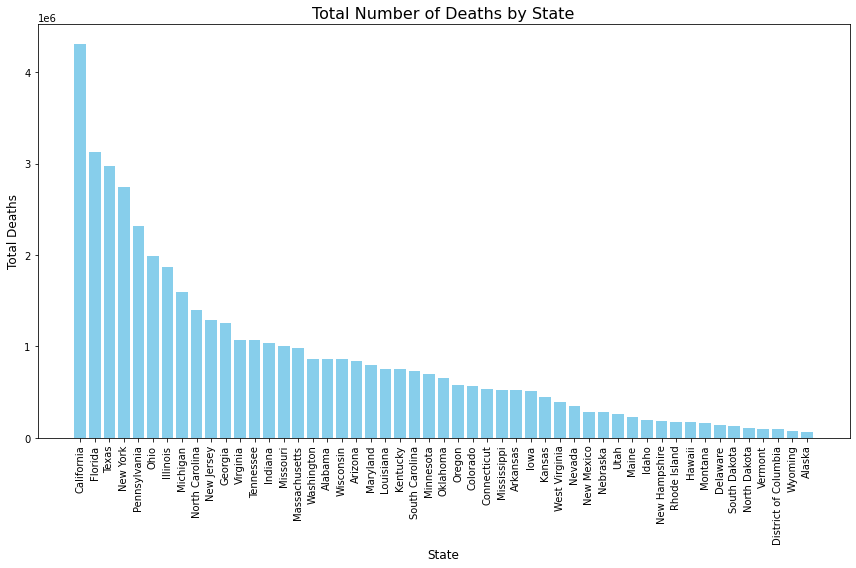

In [12]:
# Group by 'State' and sum the values of deaths
deaths_by_state = df.groupby('State').sum().reset_index()

# Sort the data by the total number of deaths (replace 'Total_Deaths' with the actual column name)
deaths_by_state_sorted = deaths_by_state.sort_values(by='Deaths', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(deaths_by_state_sorted['State'], deaths_by_state_sorted['Deaths'], color='skyblue')

# Add labels and title
plt.title('Total Number of Deaths by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
# Display the column names of the causes_of_death_df DataFrame
print(df.columns)


Index(['Notes', 'State', 'State Code', 'Ten-Year Age Groups',
       'Ten-Year Age Groups Code', 'Gender', 'Gender Code', 'Race',
       'Race Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')


### Inspecting our data

Let's go one step further and print the data type of each column. 

In the cell below, use the `.info()` method of the DataFrame, and note the data type that each column is currently stored as.  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Notes                     0 non-null      float64
 1   State                     4115 non-null   object 
 2   State Code                4115 non-null   int64  
 3   Ten-Year Age Groups       4115 non-null   object 
 4   Ten-Year Age Groups Code  4115 non-null   object 
 5   Gender                    4115 non-null   object 
 6   Gender Code               4115 non-null   object 
 7   Race                      4115 non-null   object 
 8   Race Code                 4115 non-null   object 
 9   Deaths                    4115 non-null   int64  
 10  Population                4115 non-null   object 
 11  Crude Rate                4115 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


Let's look at some samples from the `Population` column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [14]:
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


Just to be extra sure, let's check the value counts to see how many times each unique value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [17]:
# Get the value counts of the 'population' column and display the top 5
top_5_population_counts = df['Population'].value_counts().head(5)

# Print the top 5 value counts
print(top_5_population_counts)


Not Applicable    75
3556               2
5142               2
8198               2
148                2
Name: Population, dtype: int64


Clearly, this data should be stored as a numeric type, not a categorical type.  
 
### Reformat the `Population` column as an integer
As it stands, not all values can be reformated as integers. Most of the cells in the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `'Not Applicable'`.

We need to remove these rows before we can cast the `Population` column to an integer data type. 

In the cell below:

* Slice the rows of `df` where the `Population` column is equal to `'Not Applicable'`  
* Use `to_drop.index` to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`  
* Cast the `Population` column to an integer data type using the `.astype()` method, with the single parameter `int64` passed in  
* Print the `Population` column's `dtype` attribute to confirm it is now stored in `int64` format  


**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it.

In [19]:

# Slice the rows where 'Population' is equal to 'Not Applicable'
to_drop = df[df['Population'] == 'Not Applicable']

# Drop the rows where 'Population' is 'Not Applicable'
df.drop(to_drop.index, axis=0, inplace=True)

# Convert the 'Population' column to integer (int64) data type
df['Population'] = df['Population'].astype('int64')

# Print the dtype of the 'population' column to confirm the change
print(df['Population'].dtype)


int64


### Complete the bar chart

Now that we've reformatted our data, let's create a bar chart of the mean `Population` by `State`. 

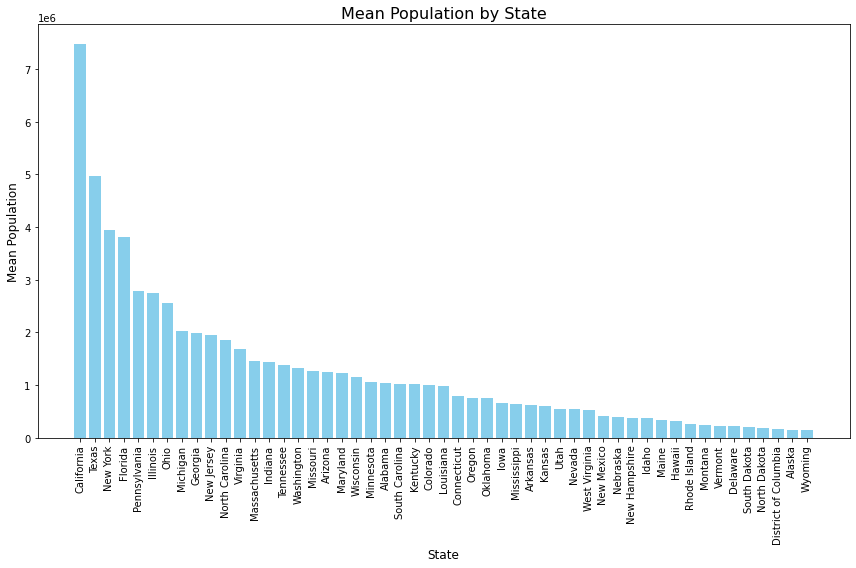

In [21]:
import matplotlib.pyplot as plt

# Group by 'State' and calculate the mean of the 'Population' column
mean_population_by_state = df.groupby('State')['Population'].mean().reset_index()

# Sort the states by mean population in descending order (optional, for better visualization)
mean_population_by_state_sorted = mean_population_by_state.sort_values(by='Population', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(mean_population_by_state_sorted['State'], mean_population_by_state_sorted['Population'], color='skyblue')

# Add labels and title
plt.title('Mean Population by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Mean Population', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


Below we will investigate how we can combine the `.pivot()` method along with the `.groupby()` method to combine some cool **stacked bar charts**.

## Use aggregate methods

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Deaths'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation of these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the `.head()` of this new DataFrame.

In [22]:
# Group by 'State' and 'Gender', slice 'Deaths' and 'Population', then calculate aggregates
aggregated_df = df.groupby(['State', 'Gender'])[['Deaths', 'Population']].agg(['mean', 'min', 'max', 'std'])

# Display the first few rows of the aggregated DataFrame
print(aggregated_df.head())


                      Deaths                              Population         \
                        mean min     max           std          mean    min   
State   Gender                                                                
Alabama Female  10753.325000  10  116297  24612.250487  1.078713e+06   2087   
        Male    10765.850000  10   88930  20813.538537  1.014946e+06   1129   
Alaska  Female    679.975000  13    4727   1154.870455  1.440403e+05   1224   
        Male      860.357143  12    5185   1411.777392  1.518884e+05    578   
Arizona Female   8998.386364  21  133923  26245.941003  1.246502e+06  12211   

                                       
                    max           std  
State   Gender                         
Alabama Female  4334752  1.400309e+06  
        Male    4284775  1.397830e+06  
Alaska  Female   682855  2.015793e+05  
        Male     770502  2.238843e+05  
Arizona Female  6265346  2.096632e+06  


Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [23]:
# Display the index of the aggregated DataFrame
print(aggregated_df.index)


MultiIndex([(      'Alabama', 'Female'),
            (      'Alabama',   'Male'),
            (       'Alaska', 'Female'),
            (       'Alaska',   'Male'),
            (      'Arizona', 'Female'),
            (      'Arizona',   'Male'),
            (     'Arkansas', 'Female'),
            (     'Arkansas',   'Male'),
            (   'California', 'Female'),
            (   'California',   'Male'),
            ...
            (     'Virginia', 'Female'),
            (     'Virginia',   'Male'),
            (   'Washington', 'Female'),
            (   'Washington',   'Male'),
            ('West Virginia', 'Female'),
            ('West Virginia',   'Male'),
            (    'Wisconsin', 'Female'),
            (    'Wisconsin',   'Male'),
            (      'Wyoming', 'Female'),
            (      'Wyoming',   'Male')],
           names=['State', 'Gender'], length=102)


A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `.reset_index()` method.  Then, display the `.head()` of the DataFrame.  

In [24]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather than the index
# Reset the index of the DataFrame
aggregated_df_reset = aggregated_df.reset_index()

# Display the first few rows of the DataFrame
print(aggregated_df_reset.head())


     State  Gender        Deaths                              Population  \
                            mean min     max           std          mean   
0  Alabama  Female  10753.325000  10  116297  24612.250487  1.078713e+06   
1  Alabama    Male  10765.850000  10   88930  20813.538537  1.014946e+06   
2   Alaska  Female    679.975000  13    4727   1154.870455  1.440403e+05   
3   Alaska    Male    860.357143  12    5185   1411.777392  1.518884e+05   
4  Arizona  Female   8998.386364  21  133923  26245.941003  1.246502e+06   

                                 
     min      max           std  
0   2087  4334752  1.400309e+06  
1   1129  4284775  1.397830e+06  
2   1224   682855  2.015793e+05  
3    578   770502  2.238843e+05  
4  12211  6265346  2.096632e+06  


Note how the way index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [29]:
# Perform the aggregation (e.g., mean, min, max, std) on the 'grouped' object
aggregated_df = grouped.agg(['mean', 'min', 'max', 'std'])

# Reset the index of the aggregated DataFrame
aggregated_df_reset = aggregated_df.reset_index()

# Examine the columns attribute of the reset DataFrame
print(aggregated_df_reset.columns)




MultiIndex([(     'State',     ''),
            (    'Gender',     ''),
            (    'Deaths', 'mean'),
            (    'Deaths',  'min'),
            (    'Deaths',  'max'),
            (    'Deaths',  'std'),
            ('Population', 'mean'),
            ('Population',  'min'),
            ('Population',  'max'),
            ('Population',  'std')],
           )


However, look again at the displayed DataFrame -- specifically, the columns. Resetting the index has caused the DataFrame to use a multi-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [28]:
# Notice that this causes columns to be MultiIndexed
# After calling reset_index(), examine the columns attribute of the reset DataFrame
print(aggregated_df_reset.columns)


MultiIndex([(     'State',     ''),
            (    'Gender',     ''),
            (    'Deaths', 'mean'),
            (    'Deaths',  'min'),
            (    'Deaths',  'max'),
            (    'Deaths',  'std'),
            ('Population', 'mean'),
            ('Population',  'min'),
            ('Population',  'max'),
            ('Population',  'std')],
           )


### Column levels

Since we're working with multi-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `.get_level_values()` method contained within the DataFrame's `columns` attribute to get the values for the outermost layer of the index. 

In [30]:
# Get the values for the outermost level of the column MultiIndex
outer_level_values = aggregated_df_reset.columns.get_level_values(0)

# Display the outermost level values
print(outer_level_values)


Index(['State', 'Gender', 'Deaths', 'Deaths', 'Deaths', 'Deaths', 'Population',
       'Population', 'Population', 'Population'],
      dtype='object')


Now, get the level values for the inner layer of the index. 

In [31]:
# Get the values for the innermost level of the column MultiIndex
inner_level_values = aggregated_df_reset.columns.get_level_values(1)

# Display the inner level values
print(inner_level_values)


Index(['', '', 'mean', 'min', 'max', 'std', 'mean', 'min', 'max', 'std'], dtype='object')


## Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to a more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it -- but take some time to examine the code in the cell below and see if you can understand how it works. 

In [32]:
# We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [
    col0 + "_" + col1 if col1 != "" else col0 for col0, col1 in list(zip(cols0, cols1))
]
# The list comprehension above is more complicated then what we need but creates a nicer formatting and
# demonstrates using a conditional within a list comprehension.
# This simpler version works but has some tail underscores where col1 is blank:
# grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

AttributeError: 'DataFrameGroupBy' object has no attribute 'columns'

In [34]:
# Perform an aggregation on the grouped data
aggregated_df = grouped.agg(['mean', 'min', 'max', 'std'])

# Get the outer and inner level values for the columns (after aggregation)
cols0 = aggregated_df.columns.get_level_values(0)
cols1 = aggregated_df.columns.get_level_values(1)

# Flatten the multi-level columns and combine them with an underscore
aggregated_df.columns = [
    col0 + "_" + col1 if col1 != "" else col0 for col0, col1 in zip(cols0, cols1)
]

# Display the updated columns of the aggregated DataFrame
print(aggregated_df.columns)


Index(['Deaths_mean', 'Deaths_min', 'Deaths_max', 'Deaths_std',
       'Population_mean', 'Population_min', 'Population_max',
       'Population_std'],
      dtype='object')


Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the `.head()` of the `grouped` DataFrame. 

In [35]:
grouped.head()

,Deaths,Population
0,14,3579
1,24,7443
2,2093,169339
3,2144,347921
4,33,7366
...,...,...
4053,72,230993
4054,84,242665
4055,10,25680
4056,92,589569


## Using pivots

Now, we'll gain some practice using the DataFrame's built-in `.pivot()` method.  

In the cell below, call the DataFrame's `.pivot()` method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the `.head()` of our new `pivot` DataFrame to see what it looks like. 

In [48]:
# Assuming the column name for state is 'State' with a capital 'S'
pivot_df = aggregated_df.pivot(index='Population_mean', columns='Deaths_std', values='Deaths_mean')

# Display the first few rows of the pivoted DataFrame
print(pivot_df.head())


Deaths_std       1154.870455    1411.777392    2265.979588    2569.276968    \
Population_mean                                                               
139223.600000              NaN            NaN            NaN    1149.514286   
144040.275000          679.975            NaN            NaN            NaN   
146757.468750              NaN            NaN            NaN            NaN   
151888.428571              NaN     860.357143            NaN            NaN   
163249.580645              NaN            NaN    1534.806452            NaN   

Deaths_std       2679.916190    2937.935467    3701.620269    3800.463091    \
Population_mean                                                               
139223.600000              NaN            NaN            NaN            NaN   
144040.275000              NaN            NaN            NaN            NaN   
146757.468750              NaN     1161.03125            NaN            NaN   
151888.428571              NaN            NaN      

In [46]:
# Check the column names of the DataFrame
print(aggregated_df.columns)


Index(['Deaths_mean', 'Deaths_min', 'Deaths_max', 'Deaths_std',
       'Population_mean', 'Population_min', 'Population_max',
       'Population_std'],
      dtype='object')


We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the `.head()` of the object to see if we can detect any changes.

In [49]:
# Again, notice the subtle difference of resetting the index:
# Reset the index of the pivot DataFrame
pivot_df_reset = pivot_df.reset_index()

# Display the first few rows of the reset DataFrame
print(pivot_df_reset.head())


Deaths_std  Population_mean  1154.8704553281045  1411.7773924820249  \
0             139223.600000                 NaN                 NaN   
1             144040.275000             679.975                 NaN   
2             146757.468750                 NaN                 NaN   
3             151888.428571                 NaN          860.357143   
4             163249.580645                 NaN                 NaN   

Deaths_std  2265.979588306933  2569.2769682336307  2679.916189910841  \
0                         NaN         1149.514286                NaN   
1                         NaN                 NaN                NaN   
2                         NaN                 NaN                NaN   
3                         NaN                 NaN                NaN   
4                 1534.806452                 NaN                NaN   

Deaths_std  2937.935466521269  3701.6202689342153  3800.463090742998  \
0                         NaN                 NaN                NaN

### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

<AxesSubplot:ylabel='Population_mean'>

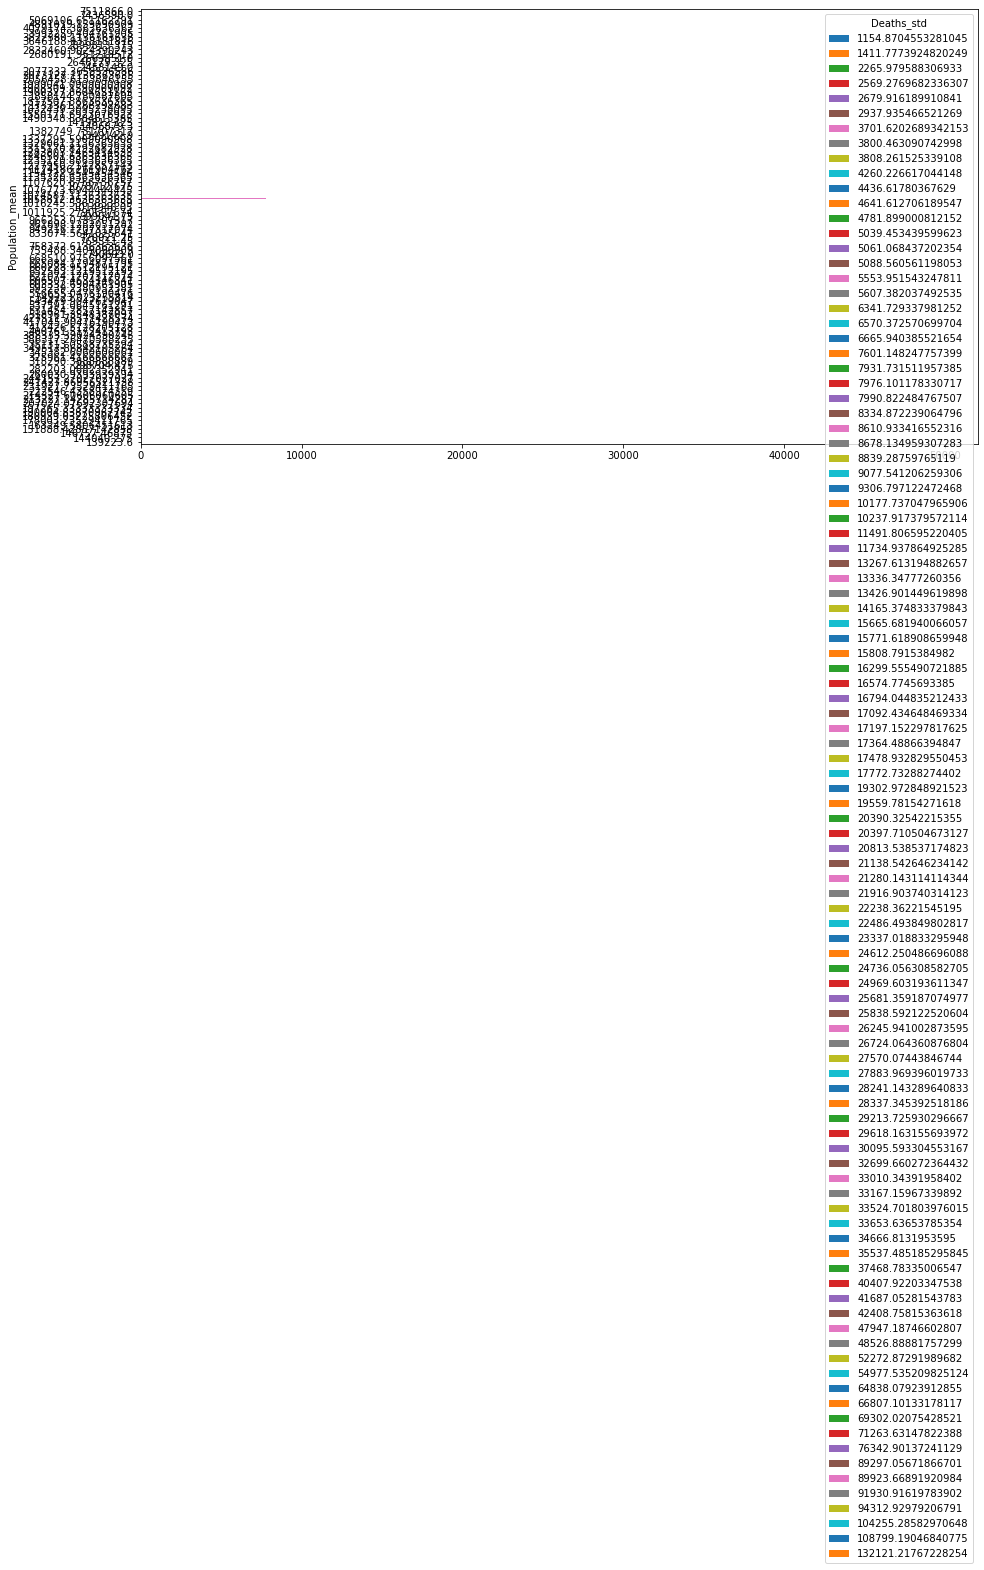

In [50]:
# Now let's make a sweet bar chart
# Create a horizontal bar chart of the pivot DataFrame
pivot_df.plot(kind='barh', figsize=(15, 8))


Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `.set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods -- do not rebind `pivot` to be equal to this line of code. 

In [52]:
# Where are the states? Notice the y-axis is just a list of numbers.
# This is populated by the DataFrame's index.
# When we used the .reset_index() method, we created a new numbered index to name each row.
# Let's fix that by making state the index again.
pivot.set_index('State').plot(kind='barh', figsize=(15, 8))

NameError: name 'pivot' is not defined

In [70]:
# Recreate the pivot DataFrame
pivot = aggregated_df.pivot(index='State', columns='Deaths_std', values='Deaths_mean')

# Chain set_index() and plot to recreate the visualization
pivot.set_index('State').plot(kind='barh', figsize=(15, 8))


KeyError: 'State'

Now that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [57]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
# The above method returned a DataFrame with State as index and we plotted it,
# but it did not update the DataFrame itself.
# Print the first few rows of the pivot DataFrame
print(pivot.head())


Deaths_std       1154.870455    1411.777392    2265.979588    2569.276968    \
Population_mean                                                               
139223.600000              NaN            NaN            NaN    1149.514286   
144040.275000          679.975            NaN            NaN            NaN   
146757.468750              NaN            NaN            NaN            NaN   
151888.428571              NaN     860.357143            NaN            NaN   
163249.580645              NaN            NaN    1534.806452            NaN   

Deaths_std       2679.916190    2937.935467    3701.620269    3800.463091    \
Population_mean                                                               
139223.600000              NaN            NaN            NaN            NaN   
144040.275000              NaN            NaN            NaN            NaN   
146757.468750              NaN     1161.03125            NaN            NaN   
151888.428571              NaN            NaN      

Note that the index has not changed.  That's because the code we wrote when we set the index to the `'State'` column returns a copy of the DataFrame object with the index set to `'State'` -- by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

In [62]:
# If we wanted to more permanently change the index we would set it first and then plot:
# Recreate the pivot DataFrame
pivot = aggregated_df.pivot(index='Population_mean', columns='Deaths_std', values='Deaths_mean')

# Set the index to 'State' and recreate the bar plot
pivot.set_index('Population_mean').plot(kind='barh', figsize=(15, 8))


KeyError: "None of ['Population_mean'] are in the columns"

Again, let's check the `.head()` of the DataFrame to confirm that the index structure has changed.  

In [63]:
# Check the first few rows of the pivot DataFrame
print(pivot.head())


Deaths_std       1154.870455    1411.777392    2265.979588    2569.276968    \
Population_mean                                                               
139223.600000              NaN            NaN            NaN    1149.514286   
144040.275000          679.975            NaN            NaN            NaN   
146757.468750              NaN            NaN            NaN            NaN   
151888.428571              NaN     860.357143            NaN            NaN   
163249.580645              NaN            NaN    1534.806452            NaN   

Deaths_std       2679.916190    2937.935467    3701.620269    3800.463091    \
Population_mean                                                               
139223.600000              NaN            NaN            NaN            NaN   
144040.275000              NaN            NaN            NaN            NaN   
146757.468750              NaN     1161.03125            NaN            NaN   
151888.428571              NaN            NaN      

Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

In [64]:
# Lastly, let's stack each of these bars for each state.
# Notice we don't have to worry about index here, because we've already set it above.
# Set the index to 'State' and create a stacked bar chart
pivot.set_index('State').plot(kind='barh', stacked=True, figsize=(15, 8))


KeyError: "None of ['State'] are in the columns"

## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

In [65]:
# Display the first few rows of the grouped DataFrame
print(grouped.head())


      Deaths  Population
0         14        3579
1         24        7443
2       2093      169339
3       2144      347921
4         33        7366
...      ...         ...
4053      72      230993
4054      84      242665
4055      10       25680
4056      92      589569
4057      10       26468

[510 rows x 2 columns]


As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

In [67]:

# Perform an aggregation (e.g., mean) on the grouped DataFrame
grouped_aggregated = grouped.mean()

# Now apply the .stack() method on the aggregated DataFrame
stacked_grouped = grouped_aggregated.stack()

# Display the first few rows of the stacked DataFrame
print(stacked_grouped.head())



State    Gender            
Alabama  Female  Deaths          10753.325
                 Population    1078712.675
         Male    Deaths          10765.850
                 Population    1014946.050
Alaska   Female  Deaths            679.975
dtype: float64


As we can see, the `.stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index. This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [68]:
# Unstack the pivot object
unstacked_pivot = pivot.unstack()

# Display the unstacked pivot
print(unstacked_pivot)


Deaths_std     Population_mean
1154.870455    1.392236e+05                NaN
               1.440403e+05         679.975000
               1.467575e+05                NaN
               1.518884e+05                NaN
               1.632496e+05                NaN
                                      ...     
132121.217672  4.079174e+06                NaN
               4.891019e+06                NaN
               5.069107e+06                NaN
               7.436590e+06                NaN
               7.511866e+06       48312.840909
Length: 10404, dtype: float64


Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results.

In the cell below, set `pivot` equal to `pivot.unstack()` again, and then print the `pivot` object to see how things have changed.

In [69]:
# Unstack the pivot object again and assign it to pivot
pivot = pivot.unstack()

# Print the pivot object to see how it has changed
print(pivot)


Deaths_std     Population_mean
1154.870455    1.392236e+05                NaN
               1.440403e+05         679.975000
               1.467575e+05                NaN
               1.518884e+05                NaN
               1.632496e+05                NaN
                                      ...     
132121.217672  4.079174e+06                NaN
               4.891019e+06                NaN
               5.069107e+06                NaN
               7.436590e+06                NaN
               7.511866e+06       48312.840909
Length: 10404, dtype: float64


After calling unstack a second time, we can see that `pivot` has a flattened structure since it has been completely unstacked.

## Summary

In this lab, we learned how to:

* Use `.groupby()` to stack and slice data conditionally
* Use aggregate methods in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 